In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Loading dataset from csv
dataset=pd.read_csv(r'SocialNetworkAds.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# extracting independent variables
X = dataset.iloc[:,[2,3]].values
print(X)

# extracting dependent variables
Y = dataset.iloc[:,4].values
print(Y)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

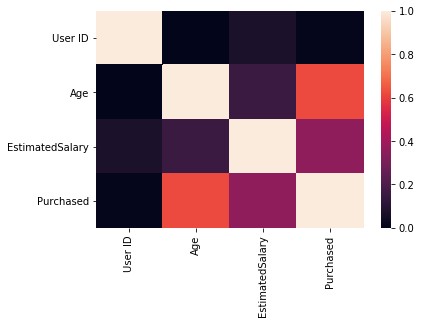

In [4]:
# Visualizing data prior to processing
sns.heatmap(dataset.corr())

In [5]:
# splitting dataset into training and testing sets
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

# Feature scaling
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

In [7]:
# fit Logistic Regression to training dataset

log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

# predicting result with testing datasets
y_pred=log_reg.predict(x_test)
print(y_pred)
print()
print(y_test)


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1]

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


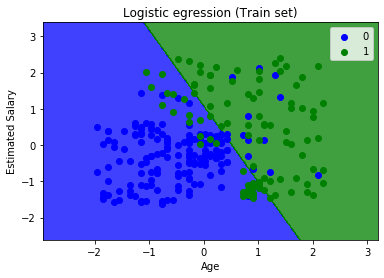

In [8]:
# visualizing the training set result
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('blue','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['blue','green'])(i),label=j)

plt.title('Logistic egression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


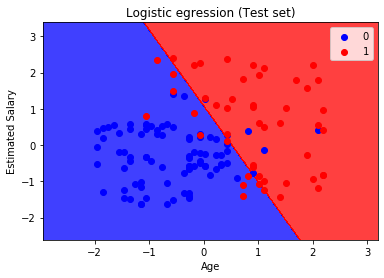

In [9]:
# visualizing the testing set result
X_set,y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('blue','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['blue','red'])(i),label=j)

plt.title('Logistic egression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [10]:
# evaluating model with confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)


[[79  6]
 [11 38]]


In [11]:

# accuracy
accuracy = (79+38)/len(y_test)
print(accuracy)


0.8731343283582089


In [12]:
# misclassification rate
mis_cla_rate  = (11+6)/len(y_test)
print(mis_cla_rate)

0.12686567164179105
